In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns


In [ ]:
# load the dataset
data = "/gdrive/MyDrive/dataset/heart_2020_cleaned.csv"

df = pd.read_csv(data,error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# df[[i for i in list(df.columns) if i not in bin_enc]]

In [ ]:
# Kolom Binary Encoding

bin_enc = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking',
       'PhysicalActivity',
       'Asthma', 'KidneyDisease', 'SkinCancer']



In [ ]:
# kolom onehotman encoding

onehot = ['GenHealth','Race']

In [ ]:
df['MentalHealth'].value_counts()

In [ ]:
# Preprocessing Data

def preprocess_data(df1):

    # Binary Eencoding
    for i in bin_enc:
      df1[i] = df1[i].replace({'Yes' : 1, 'No' : 0})

    df1['Sex'] = df1['Sex'].replace({'Male' : 1, 'Female' : 0})

    df1['AgeCategory'] = df1['AgeCategory'].replace({"18-24": 1.0, "25-29": 2.0, "30-34": 3.0, "35-39": 4.0, "40-44": 5.0,
                                  "45-49": 6.0, "50-54": 7.0, "55-59": 8.0, "60-64": 9.0, "65-69": 10.0,
                                  "70-74": 11.0, "75-79": 12.0, "80 or older": 13.0})


    # One Hotman Encoding

    for i in onehot:
      unique_vals = df1[i].unique()
      df1[i].replace(to_replace=unique_vals,
                value= list(range(len(unique_vals))),
                inplace=True)
    df1['Diabetic'] = df1['Diabetic'].replace({'Yes' : 1, 'No' : 0,'No, borderline diabetes' : 0 , 'Yes (during pregnancy)' : 1 })
  
    df1['MentalHealth'].astype('int64')


In [ ]:
df1 = df.copy()
preprocess_data(df1)

df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8.0,0,1,1,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13.0,0,0,1,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10.0,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12.0,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5.0,0,0,1,0,8.0,0,0,0


In [ ]:
# df_num = df1.select_dtypes(include=[np.float]).columns
# df_num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Index([], dtype='object')

In [ ]:
# change to int64

flt_col = ['PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']

df1[flt_col] = df1[flt_col].astype('int64')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
df1.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,7.514536,0.736794,0.135590,0.775362,1.632827,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.571156,0.342353,0.417344,1.506362,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,13.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [ ]:
df_sehat = df1[df1['HeartDisease'].isin([1])]
df_sakit = df1[df1['HeartDisease'].isin([0])]
print(df_sehat.shape)
print(df_sakit.shape)

(27373, 18)
(292422, 18)


In [ ]:
(df_sehat.shape)[0]

27373

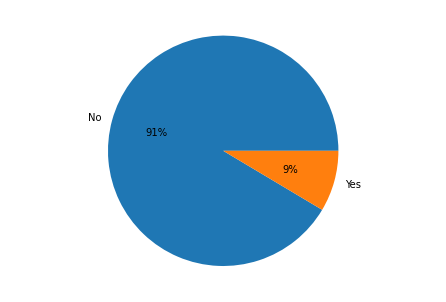

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
data = df1.HeartDisease.value_counts()

ax.pie(data,labels=labels, autopct='%.0f%%')
plt.show()



In [ ]:
data = df1.HeartDisease.value_counts()
data
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,0,1,1,0,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,0,0,1,0,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,0,1,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,0,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,0,0,1,0,8,0,0,0


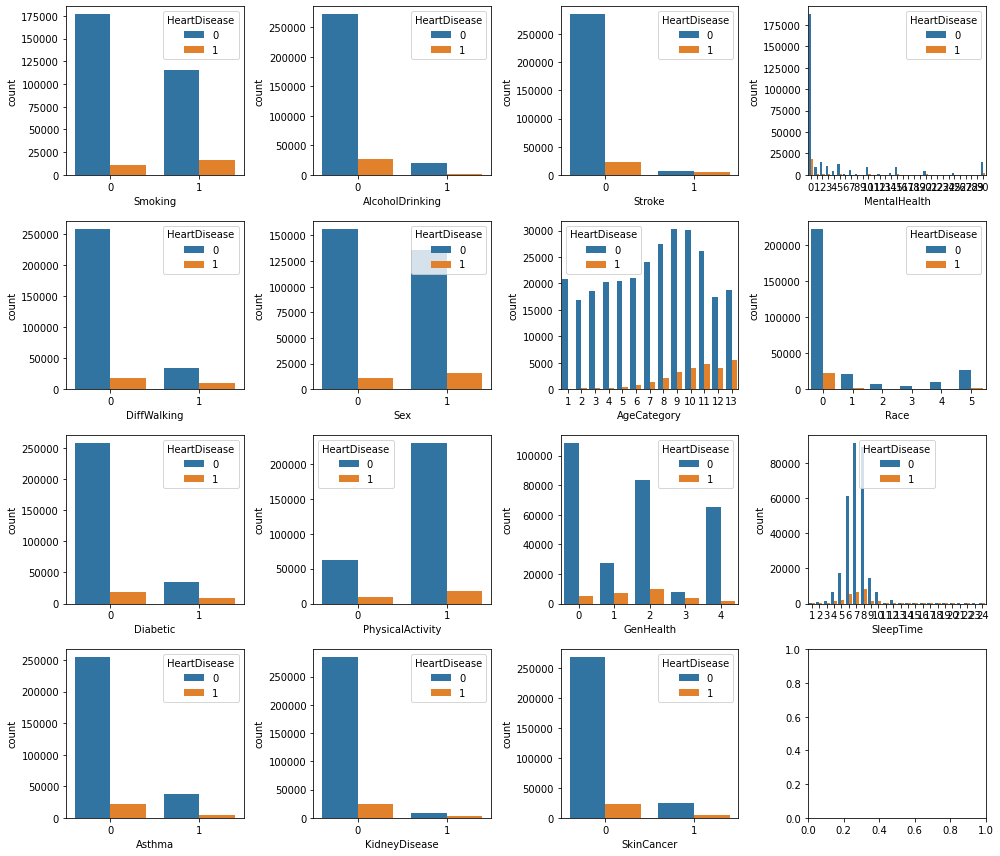

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(14, 12))
sns.countplot(data=df1, x='Smoking', hue='HeartDisease', ax=ax[0][0])
sns.countplot(data=df1, x='AlcoholDrinking', hue='HeartDisease', ax=ax[0][1])
sns.countplot(data=df1, x='Stroke', hue='HeartDisease', ax=ax[0][2])
sns.countplot(data=df1, x='MentalHealth', hue='HeartDisease', ax=ax[0][3])
sns.countplot(data=df1, x='DiffWalking', hue='HeartDisease', ax=ax[1][0])
sns.countplot(data=df1, x='Sex', hue='HeartDisease', ax=ax[1][1])
sns.countplot(data=df1, x='AgeCategory', hue='HeartDisease', ax=ax[1][2])
sns.countplot(data=df1, x='Race', hue='HeartDisease', ax=ax[1][3])
sns.countplot(data=df1, x='Diabetic', hue='HeartDisease', ax=ax[2][0])
sns.countplot(data=df1, x='PhysicalActivity', hue='HeartDisease', ax=ax[2][1])
sns.countplot(data=df1, x='GenHealth', hue='HeartDisease', ax=ax[2][2])
sns.countplot(data=df1, x='SleepTime', hue='HeartDisease', ax=ax[2][3])
sns.countplot(data=df1, x='Asthma', hue='HeartDisease', ax=ax[3][0])
sns.countplot(data=df1, x='KidneyDisease', hue='HeartDisease', ax=ax[3][1])
sns.countplot(data=df1, x='SkinCancer', hue='HeartDisease', ax=ax[3][2])

plt.tight_layout()
plt.show()


In [ ]:
df1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Split Data

In [ ]:
x = df1.drop('HeartDisease', axis=1)
y = df1.HeartDisease


In [ ]:
from sklearn.model_selection import train_test_split
import random

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state = 42)

Pembuatan Model


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train,y_train)

print('Model Logistic Regression yang terbentuk adalah: \n',log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import classification_report

y_train_pred = log_model.predict(x_train)
print('Classification Report Training Model (Logistic Regression) : \n', classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96    204773
           1       0.53      0.10      0.16     19083

    accuracy                           0.92    223856
   macro avg       0.72      0.54      0.56    223856
weighted avg       0.89      0.92      0.89    223856



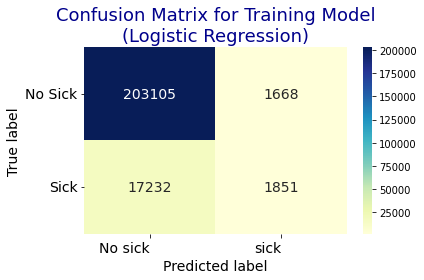

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Sick', 'Sick'), ('No sick', 'sick'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87649
           1       0.50      0.09      0.15      8290

    accuracy                           0.91     95939
   macro avg       0.71      0.54      0.55     95939
weighted avg       0.88      0.91      0.89     95939



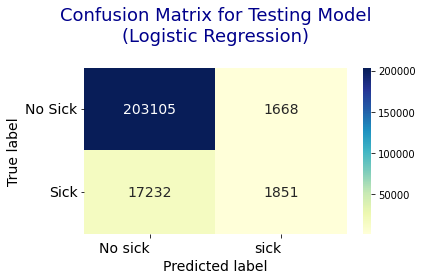

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [ ]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    204773
           1       0.99      0.97      0.98     19083

    accuracy                           1.00    223856
   macro avg       1.00      0.98      0.99    223856
weighted avg       1.00      1.00      1.00    223856



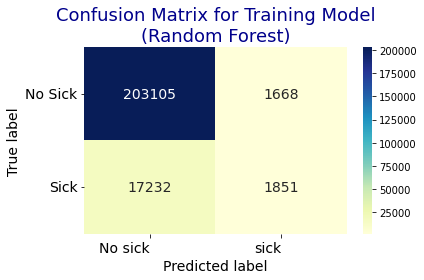

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87649
           1       0.35      0.12      0.17      8290

    accuracy                           0.90     95939
   macro avg       0.63      0.55      0.56     95939
weighted avg       0.87      0.90      0.88     95939



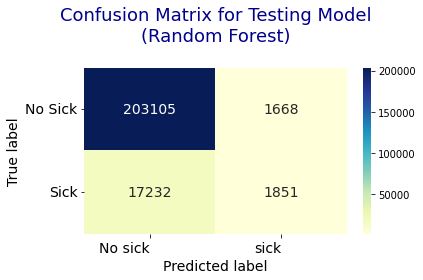

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [ ]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    204773
           1       0.58      0.10      0.16     19083

    accuracy                           0.92    223856
   macro avg       0.75      0.54      0.56    223856
weighted avg       0.89      0.92      0.89    223856



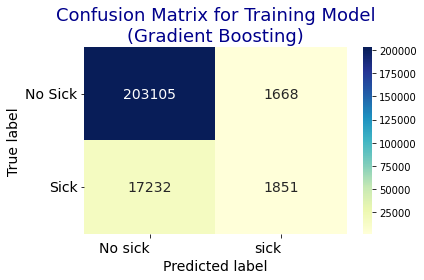

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87649
           1       0.55      0.09      0.15      8290

    accuracy                           0.92     95939
   macro avg       0.74      0.54      0.55     95939
weighted avg       0.89      0.92      0.89     95939



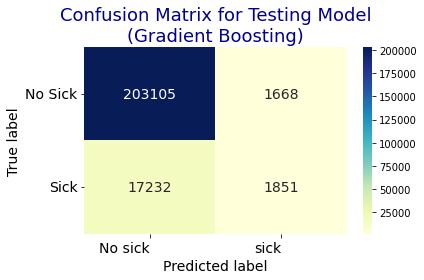

In [ ]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Kesimpulan

In [ ]:
import pickle

#Save Model
pickle.dump(gbt_model, open('best_model_churn.pkl', 'wb'))

In [ ]:
print(gbt_model)

GradientBoostingClassifier()
